<a href="https://colab.research.google.com/github/MRforce19/UAS_AI_Bagus_Indra_prastya/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:Bagus Indra Prastya
NIM:20220801025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
# Load dataset
file_path = "/content/netflix_titles.csv"
df = pd.read_csv(file_path)

In [5]:
# Menampilkan informasi awal dataset
print(df.head())
print(df.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [6]:
# Memilih fitur yang sesuai untuk clustering
# Kita akan gunakan "release_year" dan "duration" sebagai contoh

# Membersihkan data
# Mengisi nilai kosong dengan nilai yang paling sering muncul
df['duration'] = df['duration'].fillna("0 min")
df['duration'] = df['duration'].str.extract(r'(\d+)').astype(float)  # Mengambil angka saja


In [7]:
# Encoding data kategorikal
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [8]:
data = df[['release_year', 'duration', 'type']]

In [9]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [10]:
# Menentukan jumlah cluster optimal dengan Metode Elbow
inertia = []
K = range(1, 10)

In [11]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

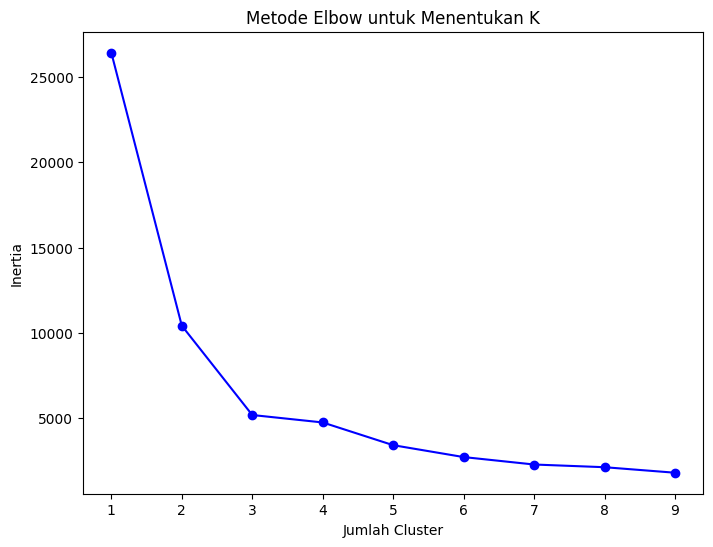

In [12]:
# Plot Metode Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [13]:
# Menjalankan K-Means dengan jumlah cluster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

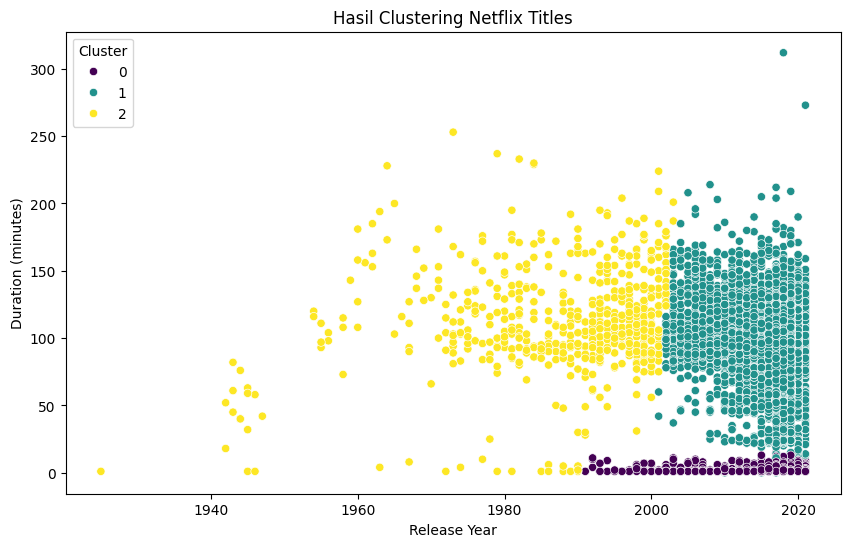

In [14]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['release_year'], y=df['duration'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.title("Hasil Clustering Netflix Titles")
plt.show()


In [15]:
# Menampilkan beberapa data yang sudah dikluster
print(df[['title', 'release_year', 'duration', 'type', 'Cluster']].head(10))


                              title  release_year  duration  type  Cluster
0              Dick Johnson Is Dead          2020      90.0     0        1
1                     Blood & Water          2021       2.0     1        0
2                         Ganglands          2021       1.0     1        0
3             Jailbirds New Orleans          2021       1.0     1        0
4                      Kota Factory          2021       2.0     1        0
5                     Midnight Mass          2021       1.0     1        0
6  My Little Pony: A New Generation          2021      91.0     0        1
7                           Sankofa          1993     125.0     0        2
8     The Great British Baking Show          2021       9.0     1        0
9                      The Starling          2021     104.0     0        1
